#### Linear Regression

In linear regression models, the target value is modeled as a linear combination of the features. The model is trained on a dataset with known target values. The model can then be used to predict the target value for new data points.

The linear regression model is defined as:

$$y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$

where $y$ is the target value, $x_1$ to $x_n$ are the feature values, and $w_0$ to $w_n$ are the model parameters. The model parameters are learned during the training process using the least squares method.

The linear regression model can be extended to include non-linear features by using a non-linear transformation of the features. For example, the model can be extended to include quadratic features as follows:

$$y = w_0 + w_1x_1 + w_2x_2 + w_3x_1^2 + w_4x_2^2$$

The linear regression model can also be extended to include interaction features as follows:

$$y = w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2$$

The linear regression model can be extended to include polynomial features and interaction features at the same time as follows:

$$y = w_0 + w_1x_1 + w_2x_2 + w_3x_1^2 + w_4x_2^2 + w_5x_1x_2$$


We will begin with the simplest linear regression model, which is the linear regression model with no polynomial features or interaction features.

We will now use the ordinary least squares `OLS` class from the `statsmodels` module to train the model.

For the data, we will use a Pandas DataFrame with two columns. The first column contains the feature values and the second column contains the target values.

In [2]:
!pip install statsmodels
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'y': [1.1, 2.1, 2.9, 3.9, 5.1, 5.9, 6.9, 8.05, 9.1, 9.7] } )

print(df)

y = df['y']
X = df['x']

    x     y
0   1  1.10
1   2  2.10
2   3  2.90
3   4  3.90
4   5  5.10
5   6  5.90
6   7  6.90
7   8  8.05
8   9  9.10
9  10  9.70


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.265e+04
Date:                Wed, 20 Sep 2023   Prob (F-statistic):                    1.28e-16
Time:                        11:56:26   Log-Likelihood:                          6.7873
No. Observations:                  10   AIC:                                     -11.57
Df Residuals:                       9   BIC:                                     -11.27
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/Ben/anaconda3/envs/phys441/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


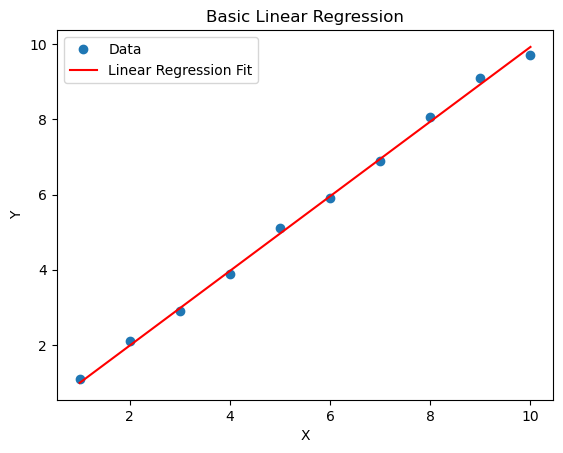

In [3]:
# Ordinary Least Squares model from statsmodels
model = sm.OLS(y, X).fit()

# View model summary
print(model.summary())

# Create prediction
y_pred = model.predict(X)

# Plotting!

plt.plot(df['x'], y, 'o', label='Data')
plt.plot(df['x'], y_pred, 'r-', label="Linear Regression Fit")
plt.title("Basic Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [4]:
import statsmodels.formula.api as smf

data = pd.read_csv("advertising.csv")

model = smf.ols('Sales ~ TV + Radio + Newspaper + (TV * Radio) + (TV * Newspaper) + (Radio * Newspaper) + I(TV * TV) + I(Radio * Radio) + I(Newspaper * Newspaper)', data=data)
model = model.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     306.2
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          4.97e-108
Time:                        11:56:26   Log-Likelihood:                -342.10
No. Observations:                 200   AIC:                             704.2
Df Residuals:                     190   BIC:                             737.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [4]:
#Radio, Newspaper, TV:Newspaper, Radio:Newspaper, and I(Newspaper:Newspaper) are statistically significant